In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
price_path = '/home/fei/Dropbox/Project2M/ASXYearlyCompanyConsolidation/'

In [3]:
years = [2013, 2014, 2015, 2016]
dat = pd.DataFrame({})
for year in years:
    dat = dat.append(pd.read_csv(os.path.join(price_path, str(year)+'price.csv')))

In [4]:
dat.loc[:, 'Date'] = pd.to_datetime(dat.loc[:, 'Date'])
gpd = dat.groupby('code')
hist_min = gpd['Close'].min()
last_price = gpd['Close'].last()
last_volume = gpd['Volume'].last()
low = (last_price >= 1.0 * hist_min) & (last_price < 1.01 * hist_min) & (.1 < last_price) & (last_price < 5) & (last_volume > 0)

In [5]:
low.value_counts()

False    2071
True       14
dtype: int64

In [6]:
low.loc[low].index

Index(['ABW.AX', 'AD1.AX', 'AEG.AX', 'AGF.AX', 'AOF.AX', 'DRO.AX', 'FFC.AX',
       'FZO.AX', 'GPX.AX', 'PDN.AX', 'SM8.AX', 'SVH.AX', 'TWR.AX', 'YBR.AX'],
      dtype='object', name='code')

In [6]:
low.loc[low].index

Index(['ABW.AX', 'ACR.AX', 'AEG.AX', 'AGF.AX', 'AOF.AX', 'CYG.AX', 'GPX.AX',
       'NZM.AX', 'PDN.AX', 'TWR.AX', 'UBN.AX', 'WMC.AX', 'XRF.AX'],
      dtype='object', name='code')

In [9]:
years = [2011, 2012, 2013, 2014, 2015, 2016]
dat = pd.DataFrame({})
for year in years:
    dat = dat.append(pd.read_csv(os.path.join(price_path, str(year)+'price.csv')))

In [23]:
code = 'ACR.AX'

In [24]:
code_dat = dat.loc[(dat.code == code).values].copy()

In [25]:
code_dat.head()

,Adj Close,Close,Date,High,Low,Open,Volume,code,is_last_11_day
5328,2.865,3.54,2011-01-03,3.54,3.54,3.54,0.0,ACR.AX,NaN
5329,2.849,3.52,2011-01-04,3.54,3.49,3.53,267400.0,ACR.AX,NaN
5330,2.857,3.53,2011-01-05,3.57,3.52,3.55,128800.0,ACR.AX,NaN
5331,2.857,3.53,2011-01-06,3.54,3.50,3.54,157700.0,ACR.AX,NaN
5332,2.817,3.48,2011-01-07,3.55,3.47,3.55,210400.0,ACR.AX,NaN


In [26]:
code_dat.loc[:, 'Date'] = pd.to_datetime(code_dat.loc[:, 'Date'])

In [27]:
code_dat = code_dat.set_index('Date')

In [ ]:
plt.figure(figsize=(10, 6))
ax = plt.subplot(111)
code_dat.loc[:, 'Close'].plot(kind='line')
plt.grid()

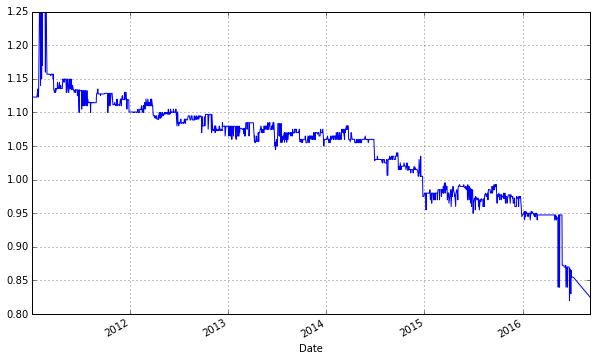

In [16]:
plt.figure(figsize=(10, 6))
ax = plt.subplot(111)
code_dat.loc[:, 'Adj Close'].plot(kind='line')
plt.grid()

In [108]:
asx_sector = pd.read_excel('sector_codes.xlsx')

In [16]:
asx_sector

,sector_code,name
0,^AXPJ,S&P/ASX 200 A-REIT
1,^AXDJ,S&P/ASX 200 Cons Disc
2,^AXSJ,S&P/ASX 200 Cons Staples
3,^AXEJ,S&P/ASX 200 Energy
4,^AXXJ,S&P/ASX 200 Fin-x-Prop
5,^AXFJ,S&P/ASX 200 Financials
6,^AXHJ,S&P/ASX 200 Health Care
7,^AXNJ,S&P/ASX 200 Industrials
8,^AXIJ,S&P/ASX 200 Info Tech
9,^AXMJ,S&P/ASX 200 Materials


In [17]:
asx_list = pd.read_excel('asx_full.xlsx')

In [110]:
asx_list.loc[(asx_list.loc[:, 'ASX code'] == 'SIO'), 'GICS industry group']

1804    Consumer Durables & Apparel
Name: GICS industry group, dtype: object